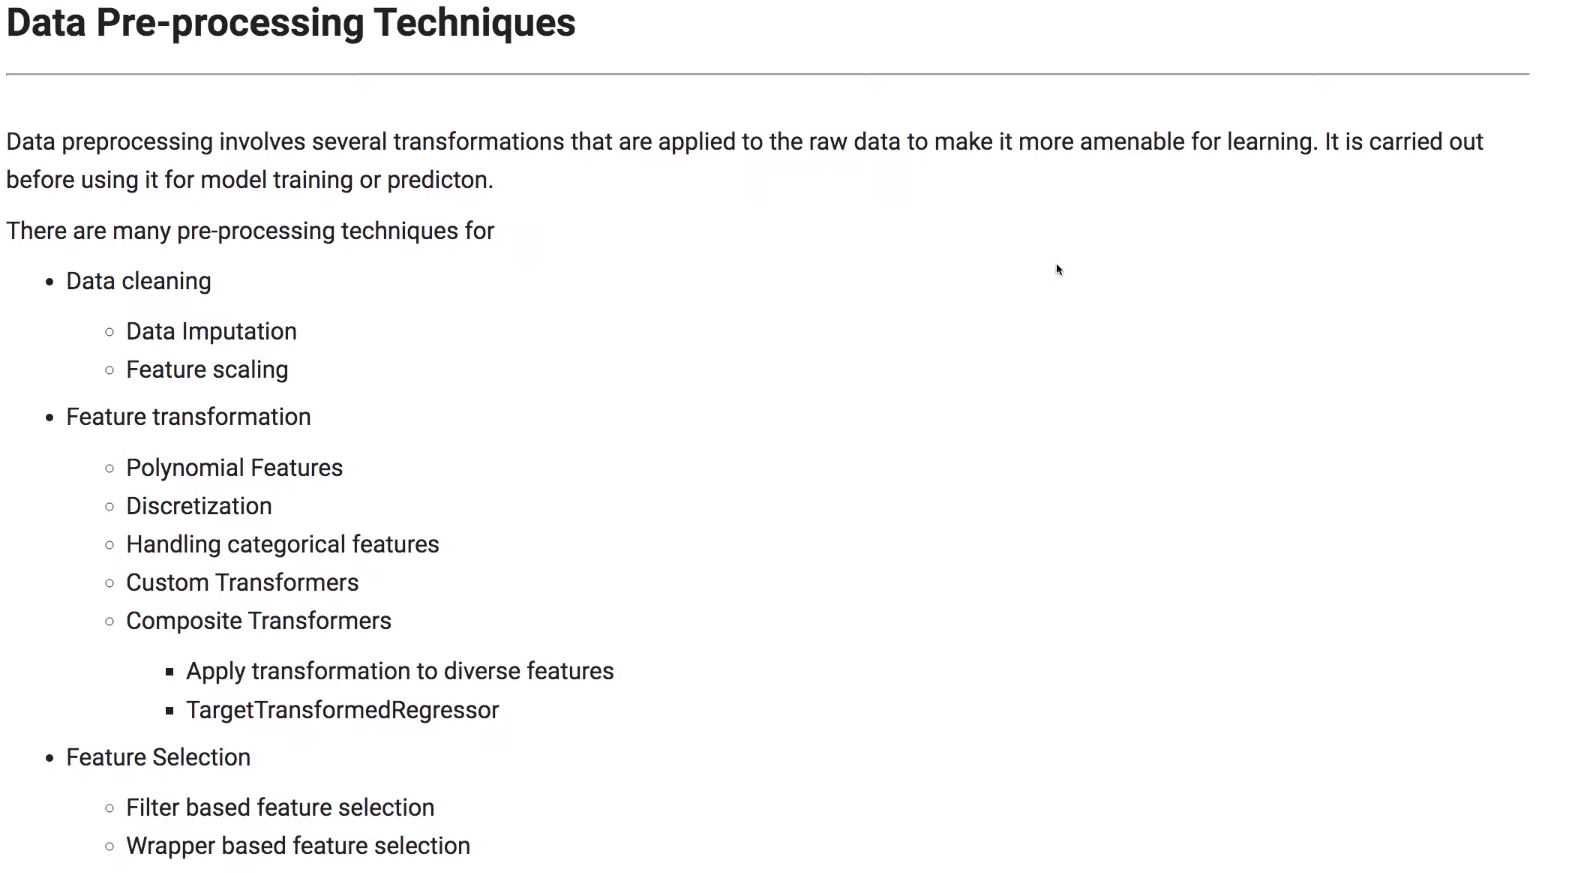
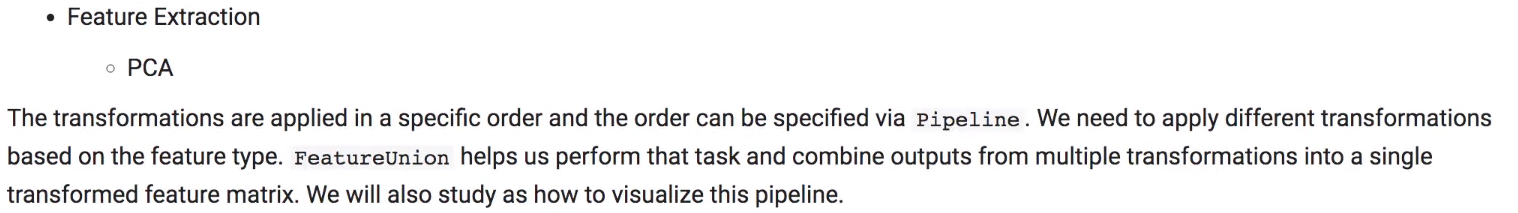
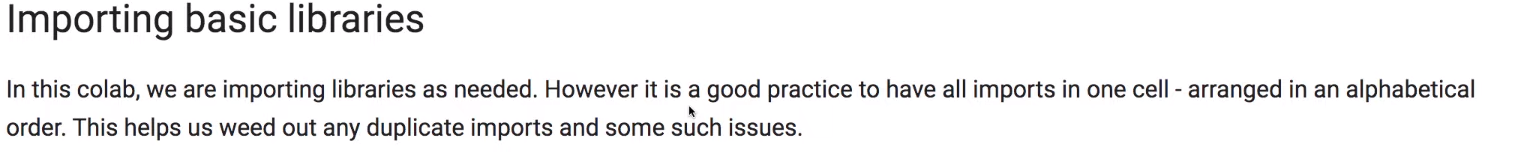

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='dark')

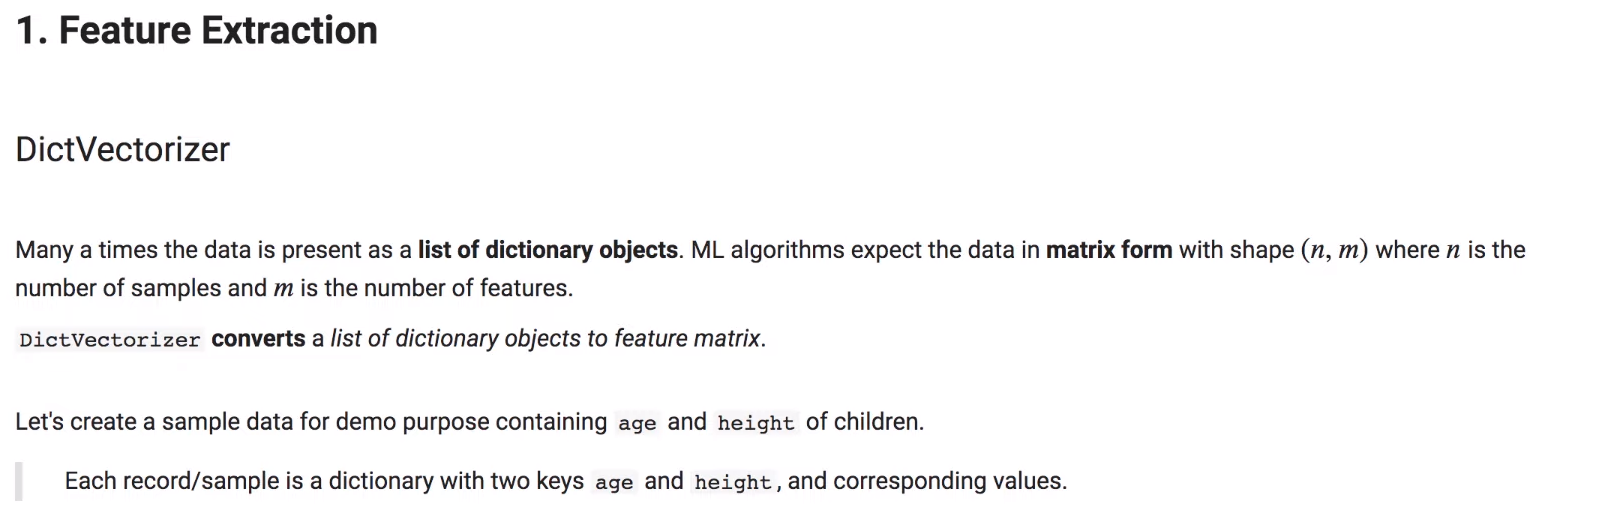

In [3]:
data = [
    {'age': 4, 'height': 96.0},
    {'age': 1, 'height': 73.9},
    {'age': 3, 'height': 88.9},
    {'age': 2, 'height': 81.6},        
]

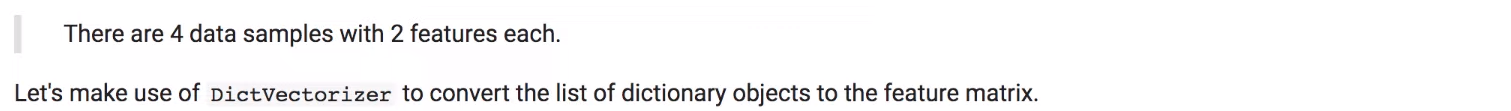

In [5]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed, data_transformed.shape

(array([[ 4. , 96. ],
        [ 1. , 73.9],
        [ 3. , 88.9],
        [ 2. , 81.6]]),
 (4, 2))

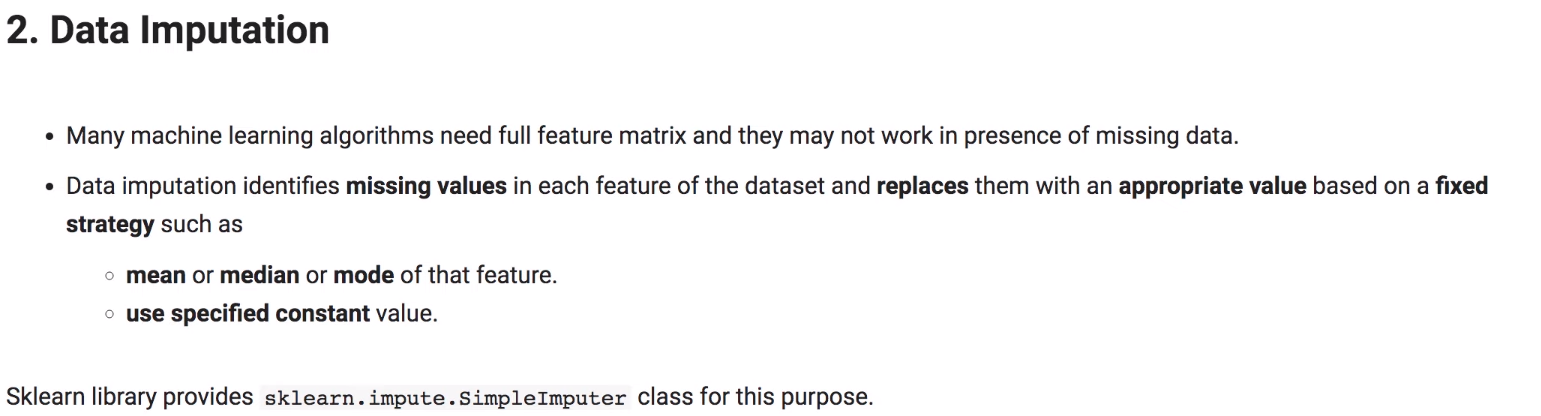

In [6]:
from sklearn.impute import SimpleImputer

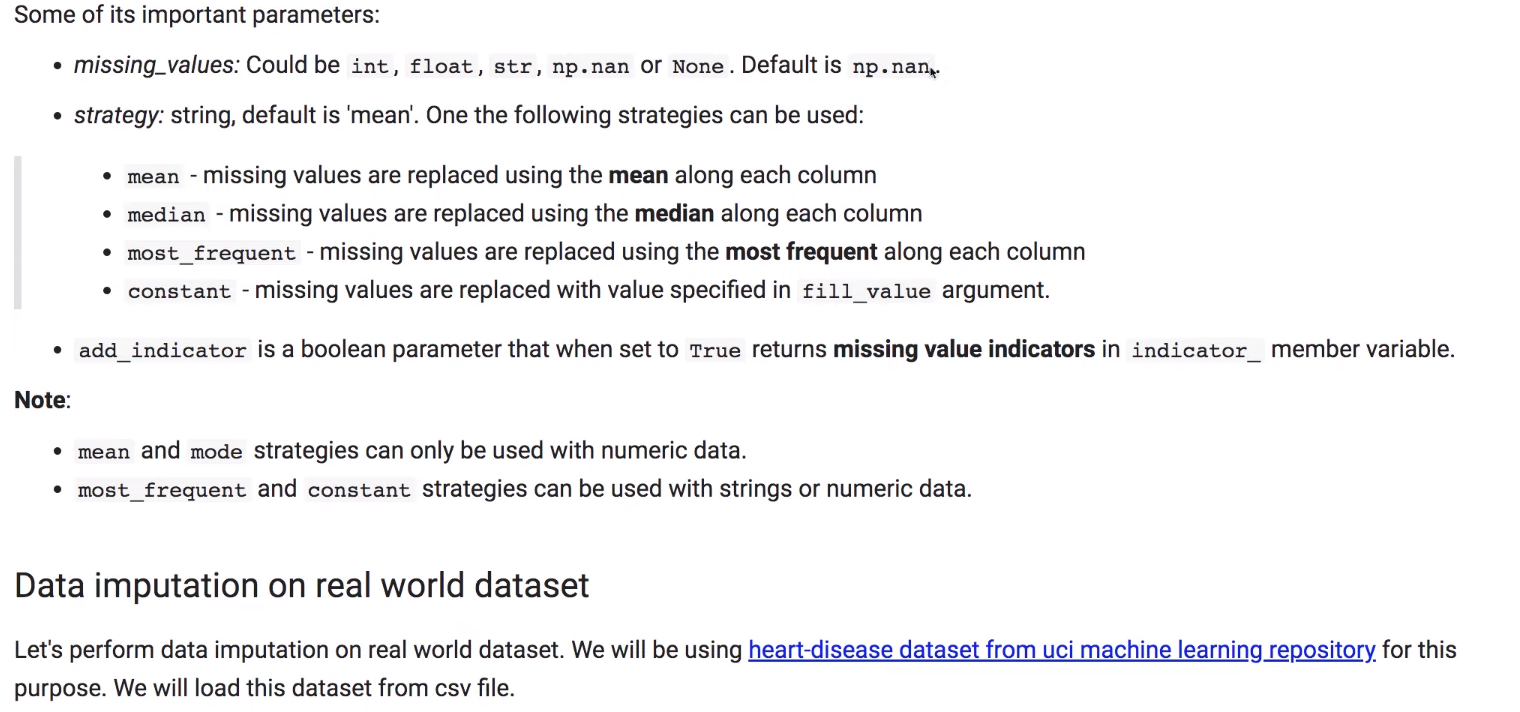

In [7]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=cols)

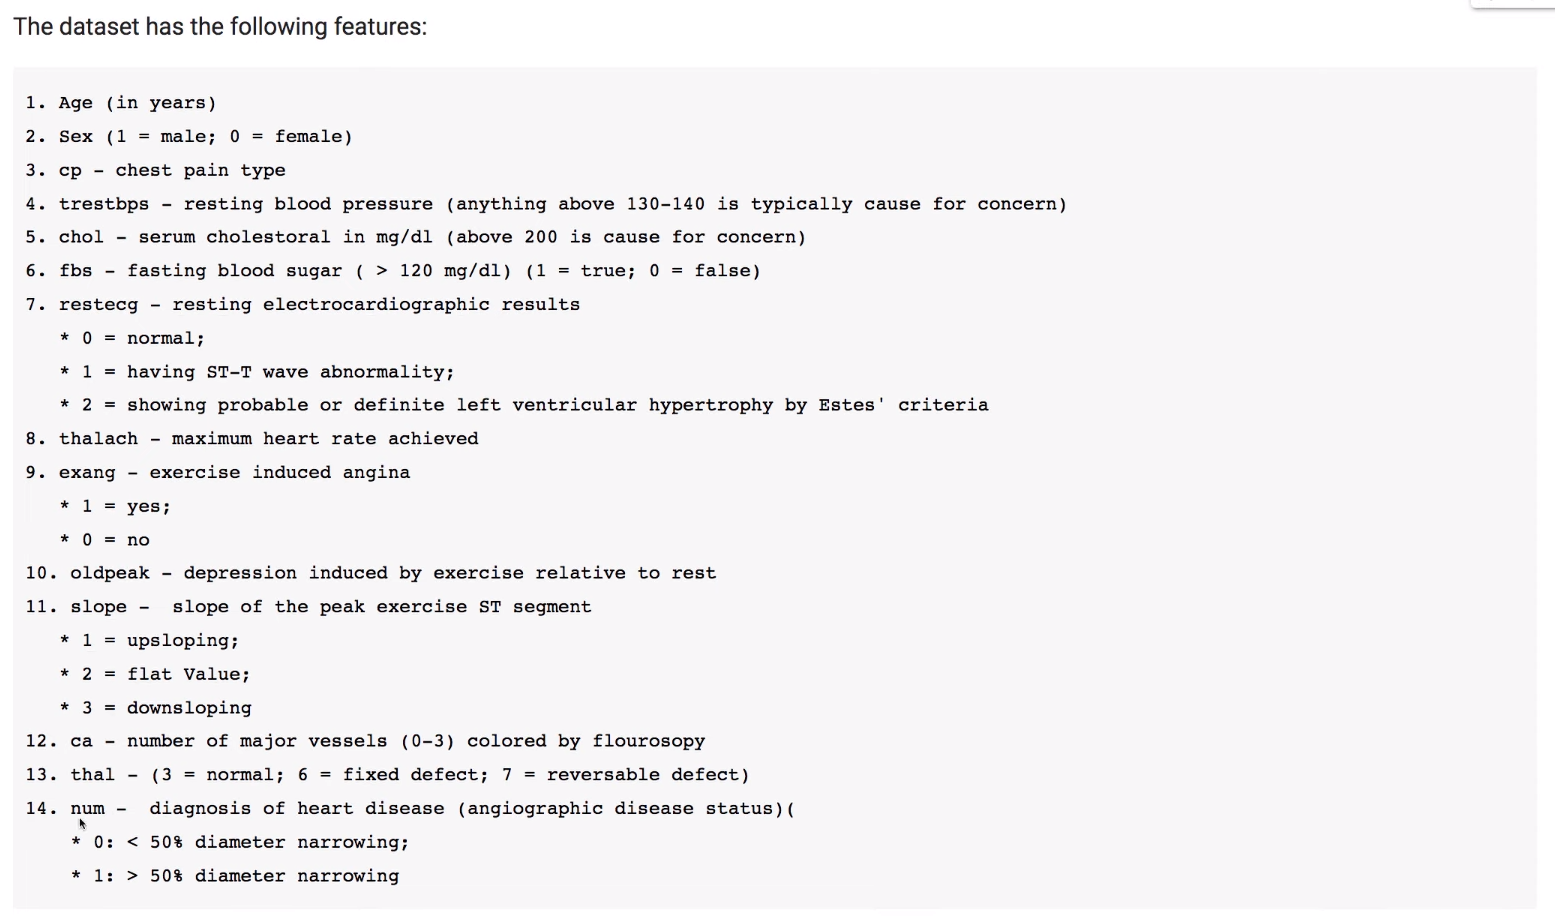
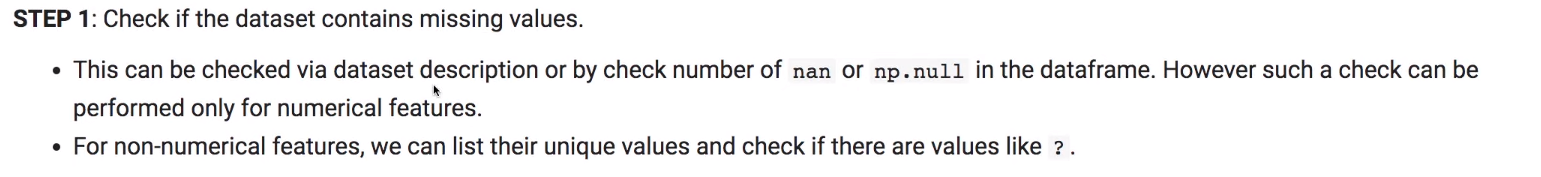

In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


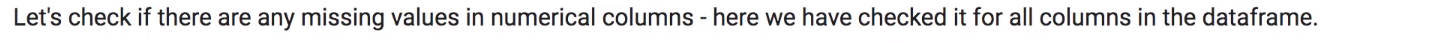

In [10]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

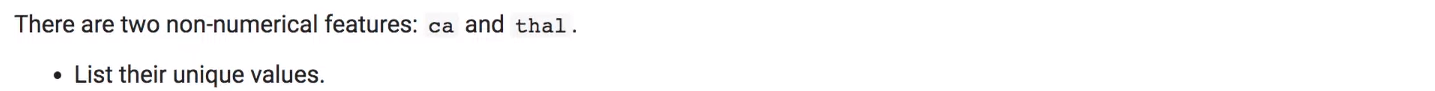

In [11]:
print('Unique values in ca:', heart_data.ca.unique())
print('Unique values in thal:', heart_data.thal.unique())

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


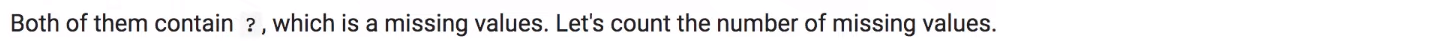


In [12]:
print('# missing values in ca:', heart_data.loc[heart_data.ca == '?', 'ca'].count())
print('# missing values in thal:', heart_data.loc[heart_data.thal == '?', 'thal'].count())

# missing values in ca: 4
# missing values in thal: 2


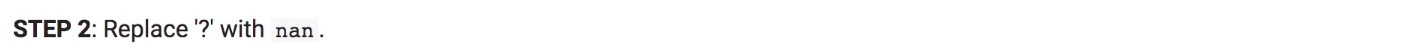

In [15]:
heart_data.replace('?', np.nan, inplace=True)
# heart_data

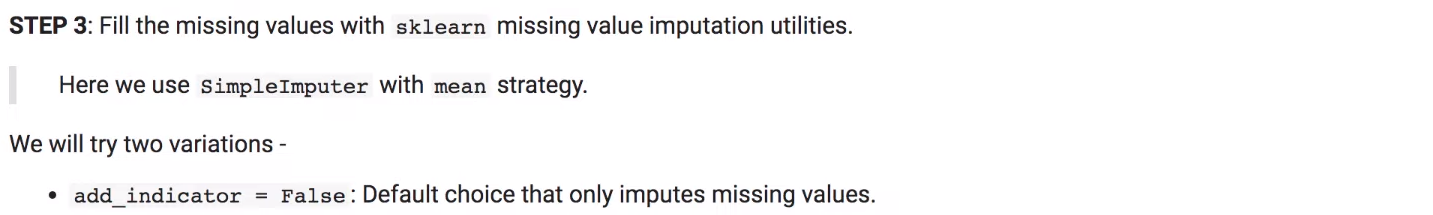

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)
heart_data_imputed

(303, 14)


array([[63.       ,  1.       ,  1.       , ...,  0.       ,  6.       ,
         0.       ],
       [67.       ,  1.       ,  4.       , ...,  3.       ,  3.       ,
         2.       ],
       [67.       ,  1.       ,  4.       , ...,  2.       ,  7.       ,
         1.       ],
       ...,
       [57.       ,  1.       ,  4.       , ...,  1.       ,  7.       ,
         3.       ],
       [57.       ,  0.       ,  2.       , ...,  1.       ,  3.       ,
         1.       ],
       [38.       ,  1.       ,  3.       , ...,  0.6722408,  3.       ,
         0.       ]])

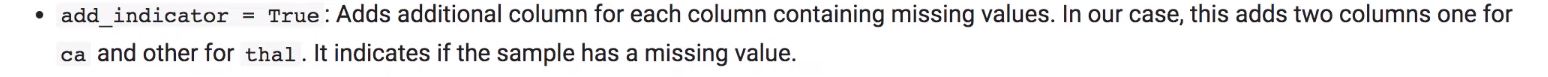

In [20]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)
heart_data_imputed_with_indicator

(303, 16)


array([[63.,  1.,  1., ...,  0.,  0.,  0.],
       [67.,  1.,  4., ...,  2.,  0.,  0.],
       [67.,  1.,  4., ...,  1.,  0.,  0.],
       ...,
       [57.,  1.,  4., ...,  3.,  0.,  0.],
       [57.,  0.,  2., ...,  1.,  0.,  0.],
       [38.,  1.,  3., ...,  0.,  1.,  0.]])

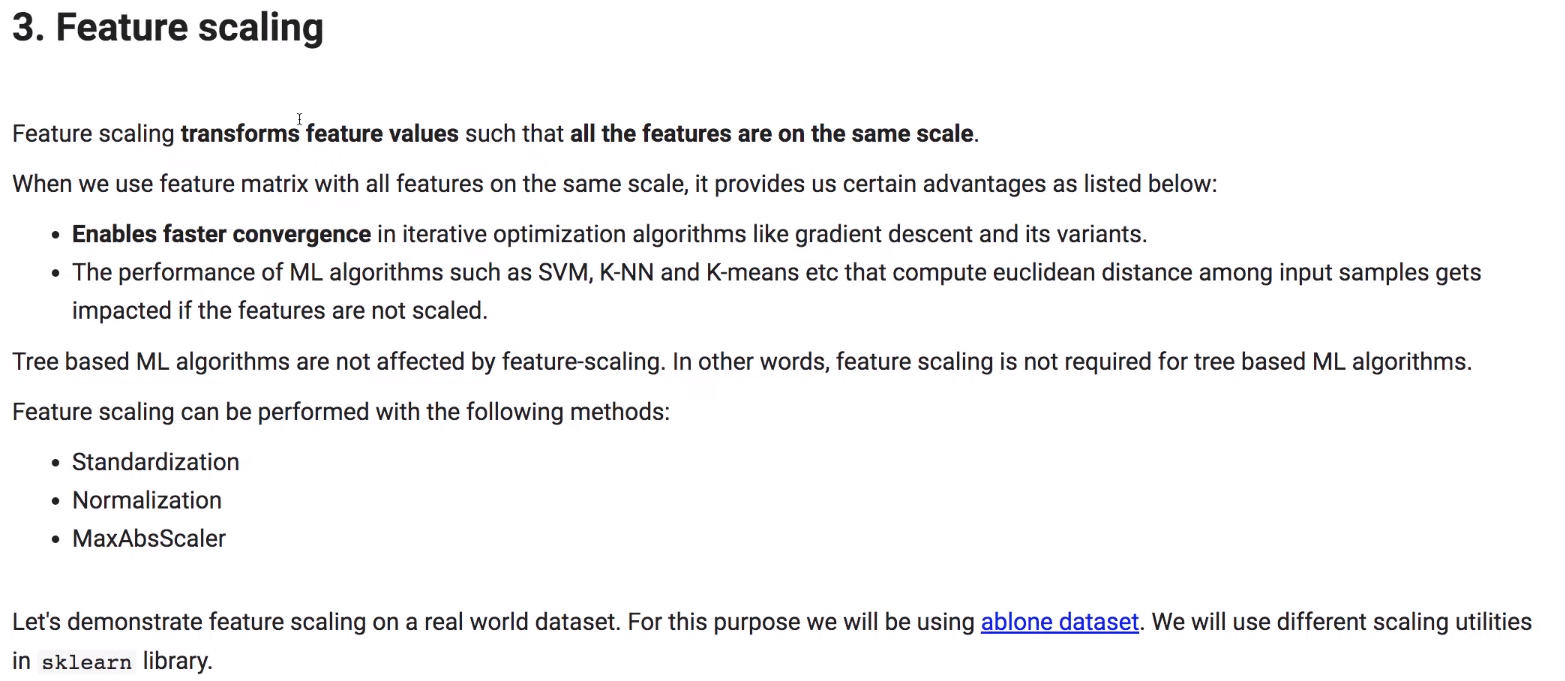

In [21]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shuked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=cols)

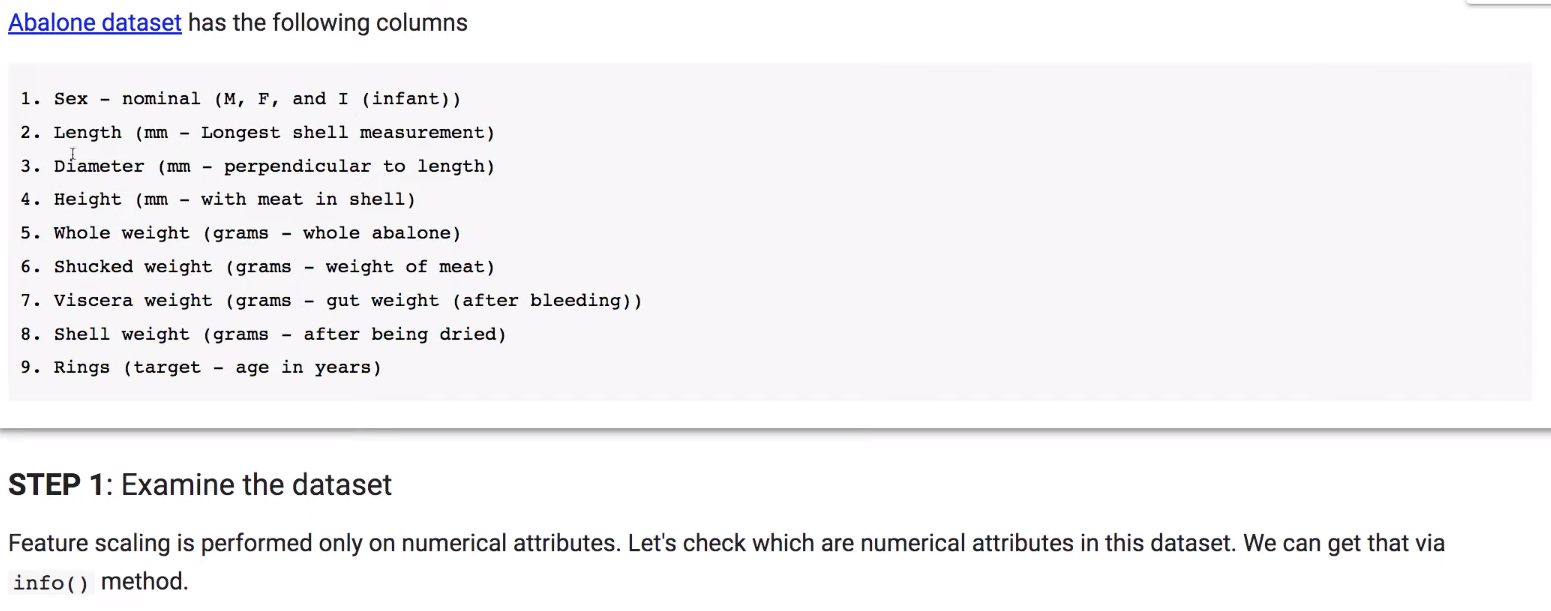

In [22]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shuked Weight   4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


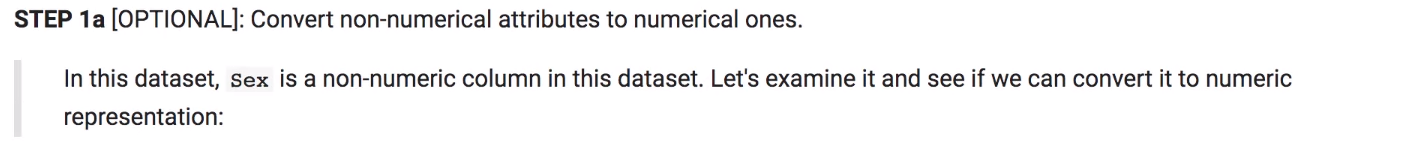

In [23]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [24]:
# Assign numerical value to sex
abalone_data = abalone_data.replace({'Sex': {'M':1, 'F':2, 'I':3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shuked Weight   4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


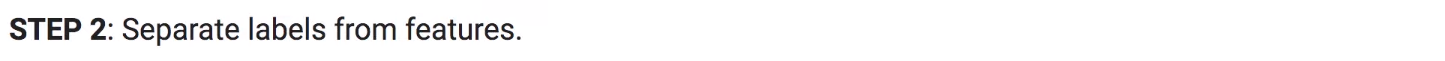

In [25]:
y = abalone_data.pop('Rings')
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shuked Weight   4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


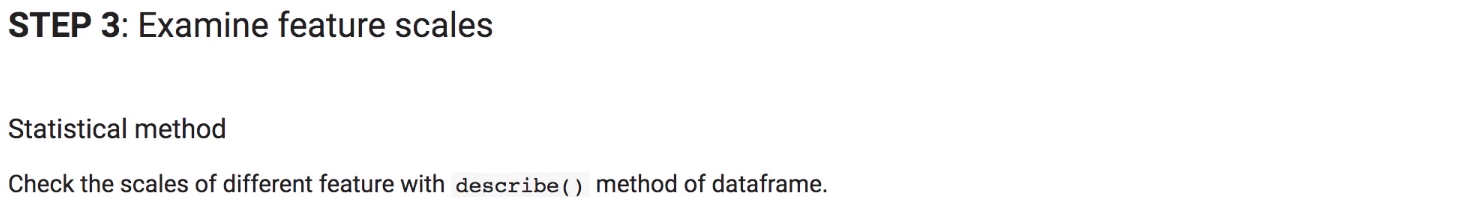

In [27]:
abalone_data.describe().T

count      mean       std     min     25%     50%    75%  \
Sex             4177.0  1.955470  0.827815  1.0000  1.0000  2.0000  3.000   
Length          4177.0  0.523992  0.120093  0.0750  0.4500  0.5450  0.615   
Diameter        4177.0  0.407881  0.099240  0.0550  0.3500  0.4250  0.480   
Height          4177.0  0.139516  0.041827  0.0000  0.1150  0.1400  0.165   
Whole Weight    4177.0  0.828742  0.490389  0.0020  0.4415  0.7995  1.153   
Shuked Weight   4177.0  0.359367  0.221963  0.0010  0.1860  0.3360  0.502   
Viscera Weight  4177.0  0.180594  0.109614  0.0005  0.0935  0.1710  0.253   
Shell Weight    4177.0  0.238831  0.139203  0.0015  0.1300  0.2340  0.329   

                   max  
Sex             3.0000  
Length          0.8150  
Diameter        0.6500  
Height          1.1300  
Whole Weight    2.8255  
Shuked Weight   1.4880  
Viscera Weight  0.7600  
Shell Weight    1.0050

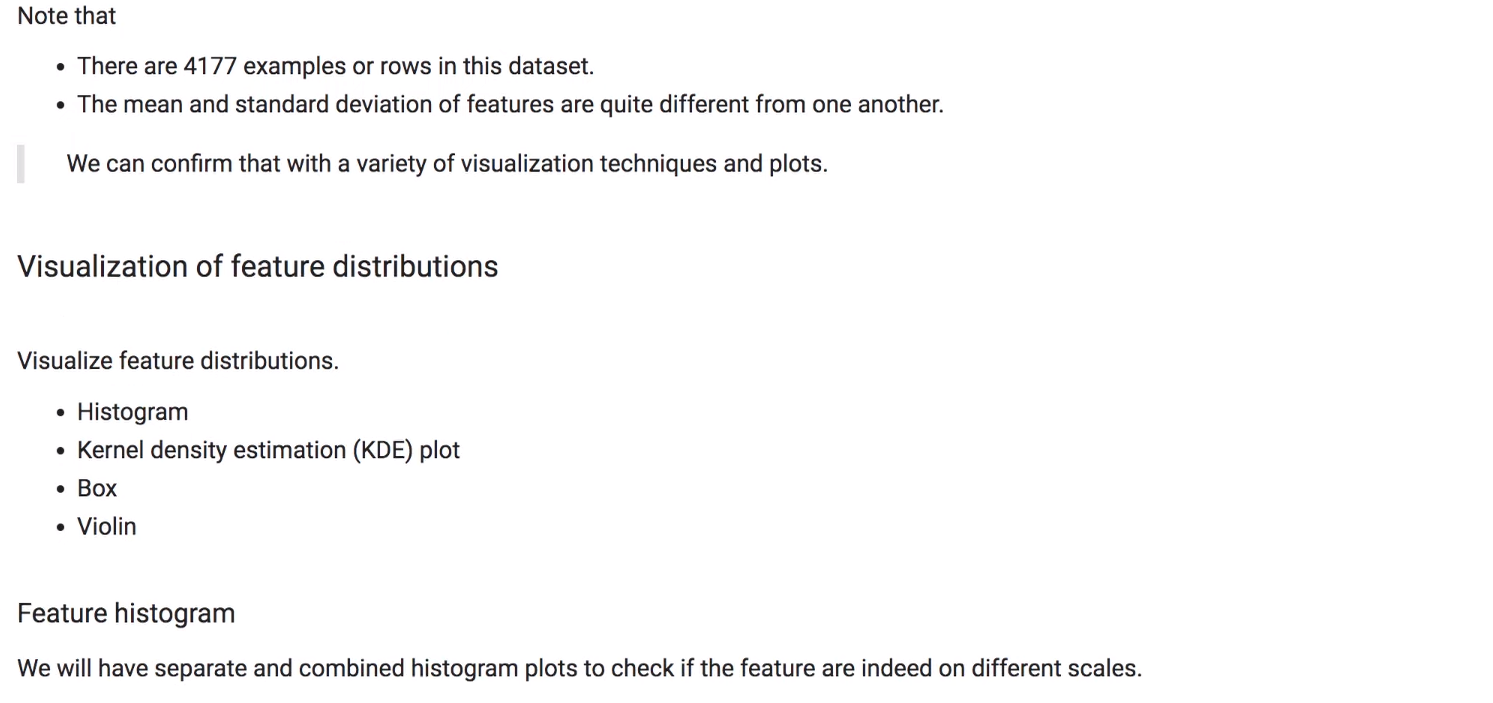

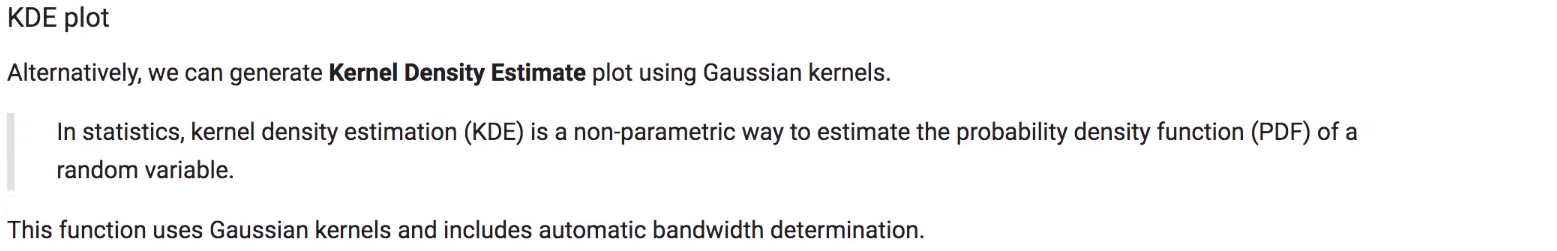

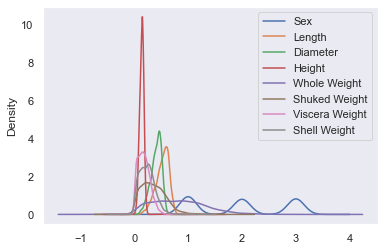

In [28]:
ax = abalone_data.plot.kde()

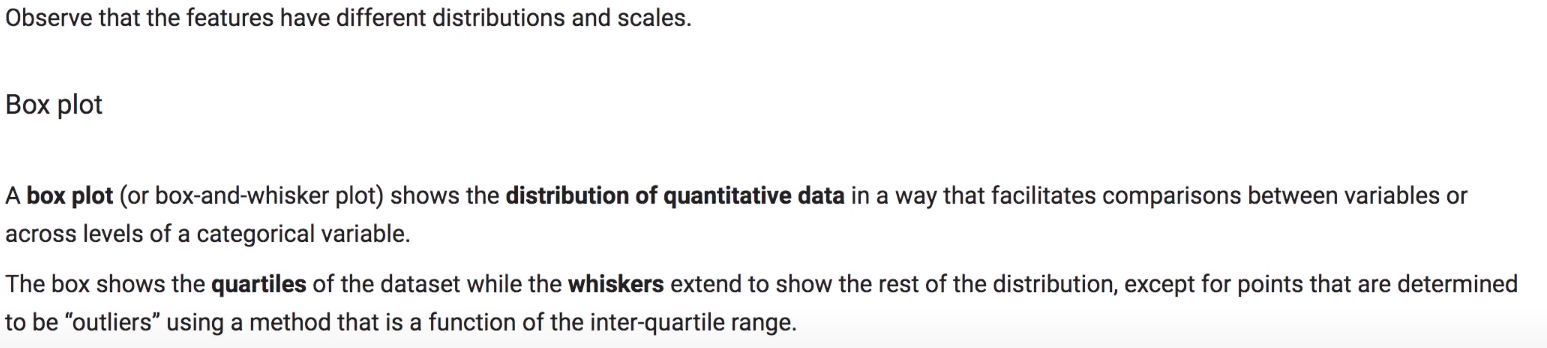

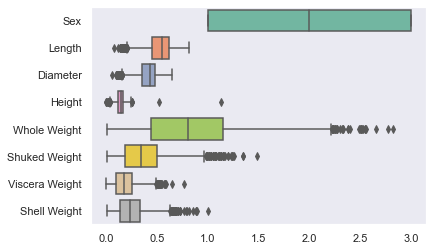

In [29]:
ax = sns.boxplot(data=abalone_data, orient="h", palette="Set2")

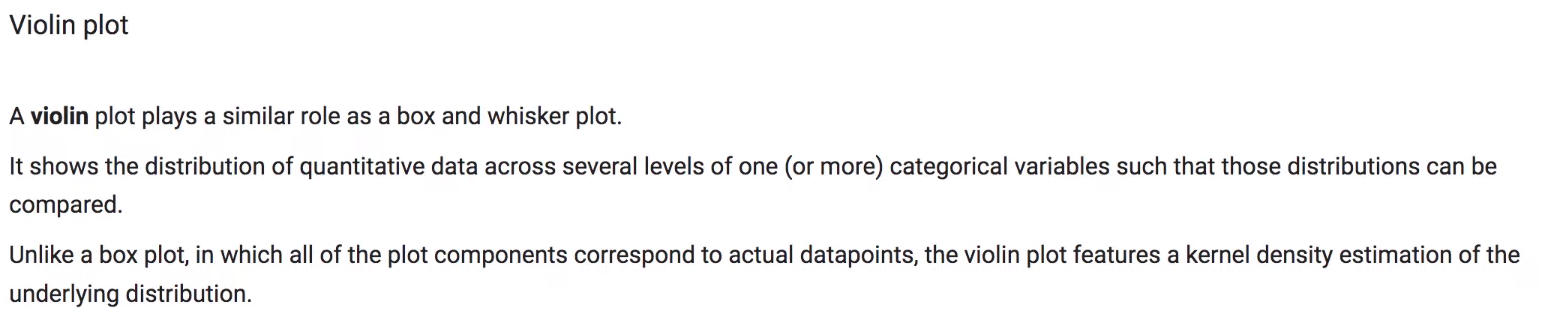

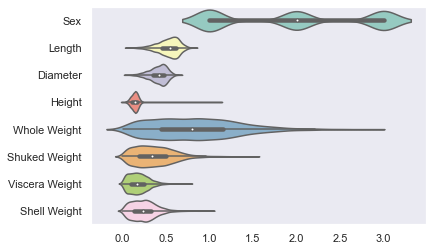

In [35]:
ax = sns.violinplot(orient="h", data=abalone_data, scale="width", palette="Set3")

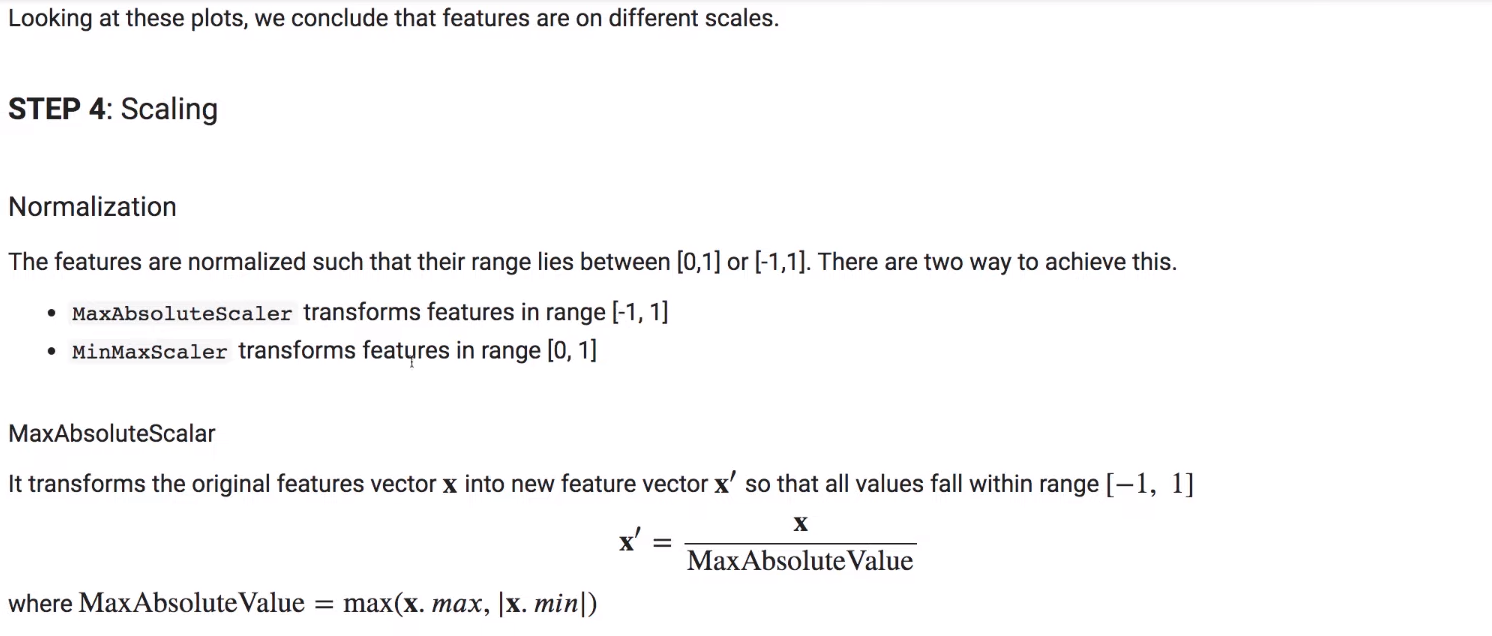

In [39]:
x = np.array([4, 2, 5, -2, -100]).reshape(-1, 1)
x

array([[   4],
       [   2],
       [   5],
       [  -2],
       [-100]])

In [38]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
x_new

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.02],
       [-1.  ]])

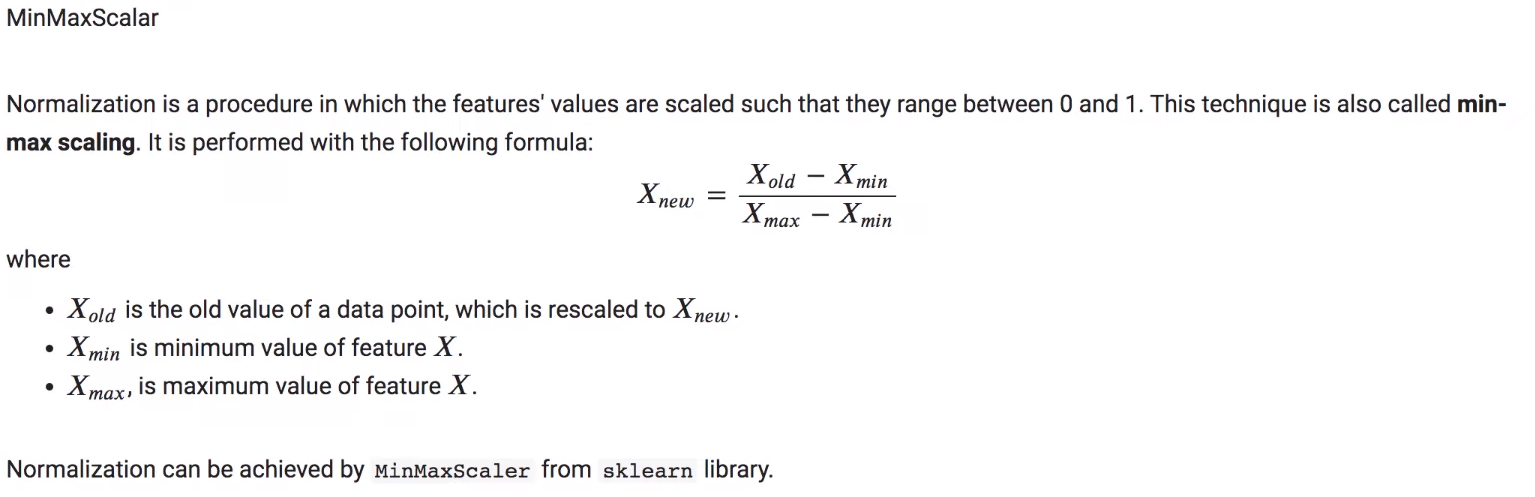

In [40]:
from sklearn.preprocessing import MinMaxScaler
X= abalone_data
mm = MinMaxScaler()
X_normalized = mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [41]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [42]:
X_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

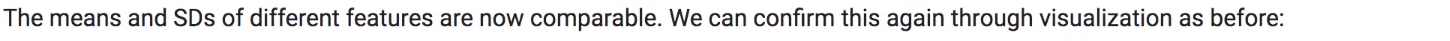

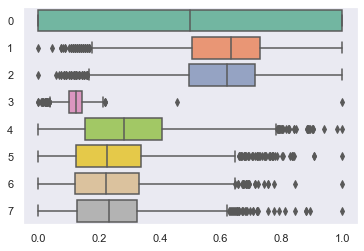

In [44]:
ax = sns.boxplot(data=X_normalized, orient="h", palette="Set2")

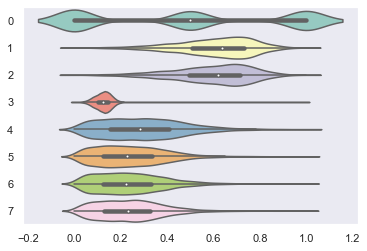

In [45]:
ax = sns.violinplot(orient="h", data=X_normalized, scale="width", palette="Set3")

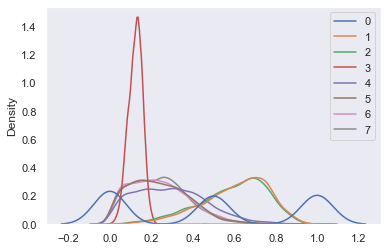

In [48]:
ax = sns.kdeplot(data=X_normalized)

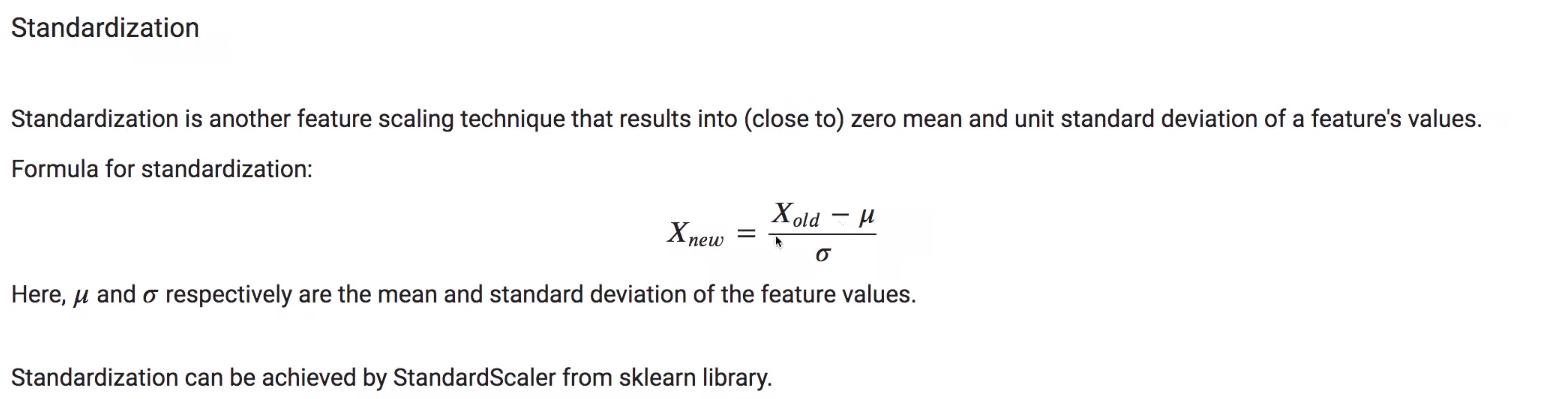

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standerdized = ss.fit_transform(X)
X_standerdized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [50]:
X_standerdized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [51]:
X_standerdized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

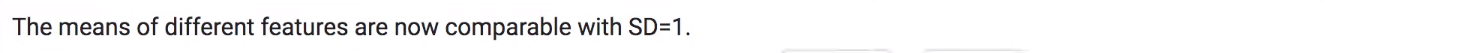

In [52]:
#@title [Histogram - combined]
# create a new plot

plt.figure(figsize=(15, 8))
data = pd.DataFrame(X_standerdized, columns=in_cols)

for colname in abalone_data:
    plt.hist(data[colname].values, alpha=0.4)
    
plt.legend(in_cols, fontsize=18, loc='upper right', frameon=True)    

NameError: name 'in_cols' is not defined

<Figure size 1080x576 with 0 Axes>

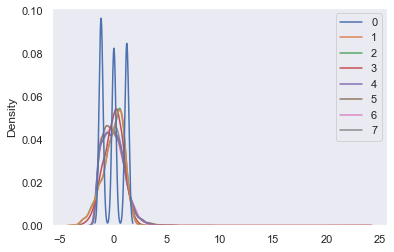

In [56]:
ax = sns.kdeplot(data=X_standerdized)

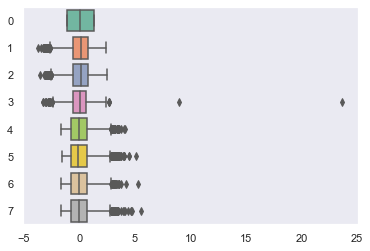

In [54]:
ax = sns.boxplot(data=X_standerdized, orient="h", palette="Set2")

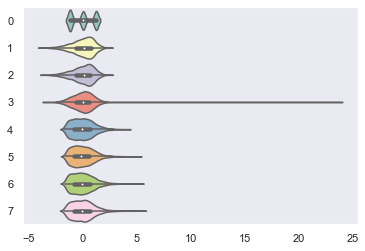

In [55]:
ax = sns.violinplot(orient="h", data=X_standerdized, scale="width", palette="Set3")